In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
DATA = "Dataset/"
object = cv2.imread(DATA + "Object.jpg")
object = cv2.cvtColor(object, cv2.COLOR_BGR2RGB)

DATA_PATH = DATA + "Data/"
data = []

for image_path in os.listdir(DATA_PATH):
    image_path = DATA_PATH + image_path
    image_data = cv2.imread(image_path)
    data.append(image_data)

grayscale_object = cv2.cvtColor(object, cv2.COLOR_RGB2GRAY)
# grayscale_object = cv2.bilateralFilter(grayscale_object, 11, 120, 120) 
# grayscale_object = cv2.medianBlur(grayscale_object, 11)
grayscale_object = cv2.GaussianBlur(grayscale_object, (11,11), 0)
grayscale_object = cv2.equalizeHist(grayscale_object)

sift = cv2.SIFT_create()
orb = cv2.ORB_create()
akaze = cv2.AKAZE_create()

target_keypoint, target_descriptor = sift.detectAndCompute(grayscale_object, None)

target_descriptor = np.float32(target_descriptor)

In [4]:
best_matches = 0
best_matches_data = None

for img in data:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    grayscale_data = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    grayscale_data = cv2.GaussianBlur(grayscale_data, (11,11), 0)
    grayscale_data = cv2.equalizeHist(grayscale_data)

    img_keypoint, img_descriptor = sift.detectAndCompute(grayscale_data, None)

    img_descriptor = np.float32(img_descriptor)

    flann = cv2.FlannBasedMatcher(dict(algorithm=1, trees=10), dict(checks=100))

    matches = flann.knnMatch(target_descriptor, img_descriptor, k=2)
    matchesmask = [[0,0] for _ in range(0, len(matches))]

    current_matches = 0

    for i, (fm,sm) in enumerate(matches):
        if fm.distance < 0.7 * sm.distance:
            matchesmask[i] = [1,0]
            current_matches += 1
    
    if current_matches > best_matches:
        best_matches = current_matches
        best_matches_data = {
            'image_data': img,
            'keypoint' : img_keypoint,
            'descriptor': img_descriptor,
            'match': matches,
            'matchesmask' : matchesmask
        }

In [5]:
result = cv2.drawMatchesKnn(
    object,
    target_keypoint,
    best_matches_data['image_data'],
    best_matches_data['keypoint'],
    best_matches_data['match'],
    None,
    matchesMask = best_matches_data['matchesmask'],
    matchColor = [255,0,0],
    singlePointColor=[0,0,255]
)

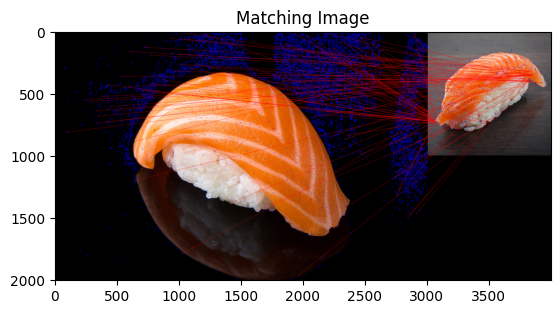

In [6]:
plt.figure()
plt.imshow(result)
plt.title("Matching Image")
plt.show()